In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# list of the Excel sheets

In [2]:
df=r"C:\Users\PRANAY\Documents\FULL STACK DATA SCIENCE jigsaw document\data science projects\Project KPMG\KPMG_VI_New_raw_data_update_final.xlsx"
print(pd.ExcelFile(df).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


# CustomerDemoGraphic

In [3]:
customer_demo=pd.read_excel(df,header=1,sheet_name='CustomerDemographic')
customer_demo.head()

C:\Users\PRANAY\AppData\Local\Temp/ipykernel_8940/1819604408.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  customer_demo=pd.read_excel(df,header=1,sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
customer_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

gender: ['F' 'Male' 'Female' 'U' 'Femal' 'M']
blanks: 0


(array([1.000e+00, 0.000e+00, 1.872e+03, 0.000e+00, 2.037e+03, 0.000e+00,
        8.800e+01, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

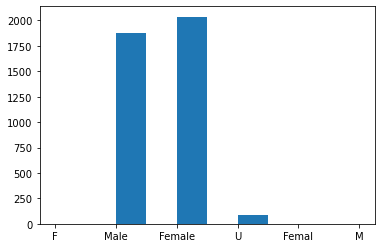

In [6]:
print('gender:', customer_demo['gender'].unique())
print('blanks:', pd.isna(customer_demo['gender']).sum())
plt.hist(customer_demo['gender'][pd.notna(customer_demo['gender'])])

In [7]:
customer_demo['past_3_years_bike_related_purchases'].describe()

count    4000.000000
mean       48.890000
std        28.715005
min         0.000000
25%        24.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: past_3_years_bike_related_purchases, dtype: float64

In [8]:
from datetime import datetime
customer_demo['age'] = (datetime.now() - customer_demo['DOB']) // 365

In [9]:
customer_demo['age'].describe()

count                           3913
mean      45 days 14:53:24.465177284
std       12 days 19:17:57.825070499
min       20 days 22:38:55.975527400
25%       35 days 23:38:06.660458906
50%       45 days 14:17:53.509773975
75%       55 days 02:23:48.578267126
max      179 days 06:28:24.742650687
Name: age, dtype: object

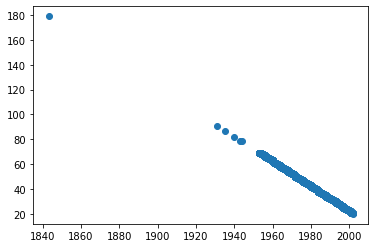

In [10]:
plt.scatter([d.year for d in customer_demo['DOB']], customer_demo['age'].dt.days)

In [11]:
print('job_title:', customer_demo['job_title'].unique())
print('blanks:', pd.isna(customer_demo['job_title']).sum())

job_title: ['Executive Secretary' 'Administrative Officer' 'Recruiting Manager' nan
 'Senior Editor' 'Media Manager I' 'Business Systems Development Analyst'
 'Senior Quality Engineer' 'Nuclear Power Engineer' 'Developer I'
 'Account Executive' 'Junior Executive' 'Media Manager IV'
 'Sales Associate' 'Professor' 'Geological Engineer' 'Project Manager'
 'Safety Technician I' 'Research Assistant I' 'Accounting Assistant III'
 'Editor' 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test Engineer II' 'Paralegal' 'VP Sales'
 'Chief Design Engineer' 'Office Assistant III'
 'Physical Therapy Assistant' 'Help Desk Operator' 'Web D

In [12]:
print('job_industry_category:', customer_demo['job_industry_category'].unique())
print('blanks:', pd.isna(customer_demo['job_industry_category']).sum())

job_industry_category: ['Health' 'Financial Services' 'Property' 'IT' nan 'Retail' 'Argiculture'
 'Manufacturing' 'Telecommunications' 'Entertainment']
blanks: 656


wealth_segment: ['Mass Customer' 'Affluent Customer' 'High Net Worth']
blanks: 0


(array([2000.,    0.,    0.,    0.,    0.,  979.,    0.,    0.,    0.,
        1021.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

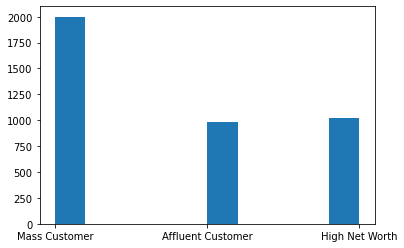

In [13]:
print('wealth_segment:', customer_demo['wealth_segment'].unique())
print('blanks:', pd.isna(customer_demo['wealth_segment']).sum())
plt.hist(customer_demo['wealth_segment'][pd.notna(customer_demo['wealth_segment'])])

deceased_indicator: ['N' 'Y']
blanks: 0


(array([3.998e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

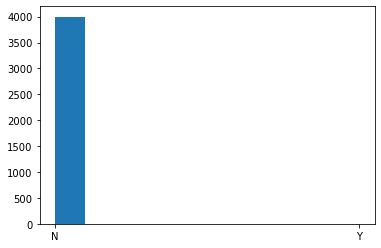

In [14]:
print('deceased_indicator:', customer_demo['deceased_indicator'].unique())
print('blanks:', pd.isna(customer_demo['deceased_indicator']).sum())
plt.hist(customer_demo['deceased_indicator'][pd.notna(customer_demo['deceased_indicator'])])

In [15]:
customer_demo['deceased_indicator'][customer_demo['deceased_indicator'] == 'Y'].count()

2

owns_car: ['Yes' 'No']
blanks: 0


(array([2024.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1976.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

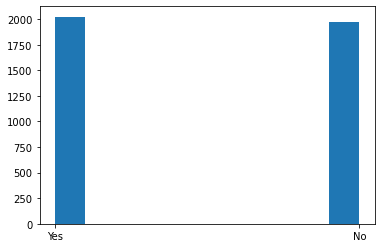

In [16]:
print('owns_car:', customer_demo['owns_car'].unique())
print('blanks:', pd.isna(customer_demo['owns_car']).sum())
plt.hist(customer_demo['owns_car'][pd.notna(customer_demo['owns_car'])])

In [17]:
customer_demo['tenure'].describe()

count    3913.000000
mean       10.657041
std         5.660146
min         1.000000
25%         6.000000
50%        11.000000
75%        15.000000
max        22.000000
Name: tenure, dtype: float64

In [18]:
print('tenure blanks:', pd.isna(customer_demo['tenure']).sum())

tenure blanks: 87


# Customer Address

In [19]:
customer_add=pd.read_excel(df,header=1,sheet_name='CustomerAddress')
customer_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [21]:
customer_add.shape

(3999, 6)

In [22]:
customer_add[customer_add.duplicated()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [23]:
print('customer_id blanks:', pd.isna(customer_add['customer_id']).sum())

customer_id blanks: 0


In [27]:
pd.notna(customer_add['customer_id'].unique()).sum()

3999

In [28]:
print('customer_ids not in demographics dataset:', sum([(1 if (i not in customer_add['customer_id']) else 0) for i in customer_add['customer_id']]))

customer_ids not in demographics dataset: 5


In [29]:
print('address blanks:', pd.isna(customer_add['address']).sum())

address blanks: 0


In [30]:
print('postcode blanks:', pd.isna(customer_add['postcode']).sum())

postcode blanks: 0


state: ['New South Wales' 'QLD' 'VIC' 'NSW' 'Victoria']
blanks: 0


(array([  86.,    0.,  838.,    0.,    0.,  939.,    0., 2054.,    0.,
          82.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

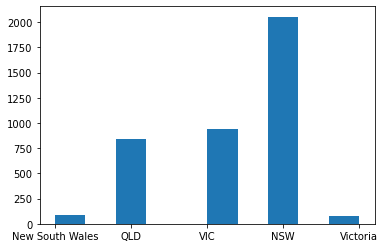

In [32]:
print('state:', customer_add['state'].unique())
print('blanks:', pd.isna(customer_add['state']).sum())
plt.hist(customer_add['state'][pd.notna(customer_add['state'])])

In [33]:
print('country:', customer_add['country'].unique())
print('blanks:', pd.isna(customer_add['country']).sum())

country: ['Australia']
blanks: 0


In [34]:
customer_add['property_valuation'].describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

property_valuation blanks: 0


(array([297., 186., 214., 225., 238., 493., 646., 647., 577., 476.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

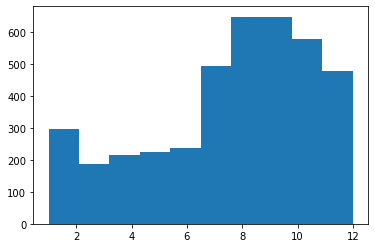

In [35]:
print('property_valuation blanks:', pd.isna(customer_add['property_valuation']).sum())
plt.hist(customer_add['property_valuation'], bins=10)

# Transactions

In [37]:
txns_df = pd.read_excel(df, header=1, sheet_name='Transactions')
txns_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [38]:
txns_df.shape

(20000, 13)

In [39]:
txns_df[txns_df.duplicated()].sum()

C:\Users\PRANAY\AppData\Local\Temp/ipykernel_8940/1885248447.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  txns_df[txns_df.duplicated()].sum()


transaction_id             0.0
product_id                 0.0
customer_id                0.0
online_order               0.0
order_status               0.0
brand                      0.0
product_line               0.0
product_class              0.0
product_size               0.0
list_price                 0.0
standard_cost              0.0
product_first_sold_date    0.0
dtype: float64

In [40]:
txns_df['list_price'].describe()

count    20000.000000
mean      1107.829449
std        582.825242
min         12.010000
25%        575.270000
50%       1163.890000
75%       1635.300000
max       2091.470000
Name: list_price, dtype: float64

In [41]:
print('list_price blanks:', pd.isna(txns_df['list_price']).sum())

list_price blanks: 0


In [42]:
txns_df['standard_cost'].describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [43]:
print('standard_cost blanks:', pd.isna(txns_df['standard_cost']).sum())

standard_cost blanks: 197


In [44]:
txns_df['profit'] = txns_df['list_price'] - txns_df['standard_cost']
txns_df['profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: profit, dtype: float64

In [45]:
print('transaction_id blanks:', pd.isna(txns_df['transaction_id']).sum())

transaction_id blanks: 0


In [46]:
print('product_id blanks:', pd.isna(txns_df['product_id']).sum())

product_id blanks: 0


In [47]:
print('customer_id blanks:', pd.isna(txns_df['customer_id']).sum())

customer_id blanks: 0


In [48]:
pd.notna(txns_df['customer_id'].unique()).sum()

3494

In [50]:
print('customer_ids not in demographics dataset:', sum([(1 if (i not in customer_add['customer_id']) else 0) for i in customer_add['customer_id']]))
print('customer_ids not in addresses dataset:', sum([(1 if (i not in customer_add['customer_id']) else 0) for i in txns_df['customer_id']]))

customer_ids not in demographics dataset: 5
customer_ids not in addresses dataset: 3


In [51]:
txns_df['transaction_date'].describe(datetime_is_numeric=True)

count                         20000
mean     2017-07-01 14:08:05.280000
min             2017-01-01 00:00:00
25%             2017-04-01 00:00:00
50%             2017-07-03 00:00:00
75%             2017-10-02 00:00:00
max             2017-12-30 00:00:00
Name: transaction_date, dtype: object

In [52]:
print('transaction_date blanks:', pd.isna(txns_df['transaction_date']).sum())

transaction_date blanks: 0


online_order: [ 0.  1. nan]
blanks: 360


(array([9811.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9829.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

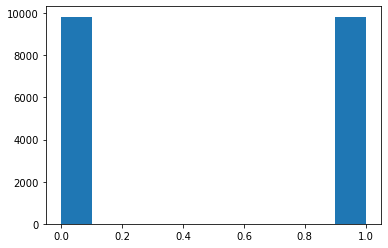

In [53]:
print('online_order:', txns_df['online_order'].unique())
print('blanks:', pd.isna(txns_df['online_order']).sum())
plt.hist(txns_df['online_order'][pd.notna(txns_df['online_order'])])

order_status: ['Approved' 'Cancelled']
blanks: 0


(array([19821.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   179.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

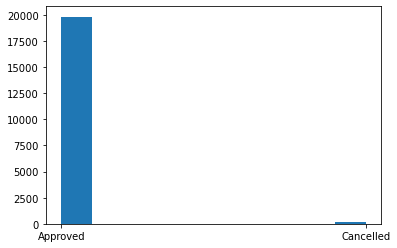

In [54]:
print('order_status:', txns_df['order_status'].unique())
print('blanks:', pd.isna(txns_df['order_status']).sum())
plt.hist(txns_df['order_status'][pd.notna(txns_df['order_status'])])

In [55]:
txns_df['order_status'][txns_df['order_status'] == 'Cancelled'].count()

179

brand: ['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
blanks: 197


(array([4253.,    0., 2990.,    0., 3043.,    0., 2910.,    0., 3312.,
        3295.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

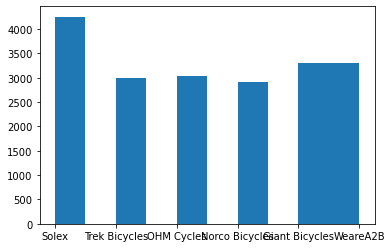

In [62]:
print('brand:', txns_df['brand'].unique())
print('blanks:', pd.isna(txns_df['brand']).sum())
plt.hist(txns_df['brand'][pd.notna(txns_df['brand'])])

product_line: ['Standard' 'Road' 'Mountain' 'Touring' nan]
blanks: 197


(array([14176.,     0.,     0.,  3970.,     0.,     0.,   423.,     0.,
            0.,  1234.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

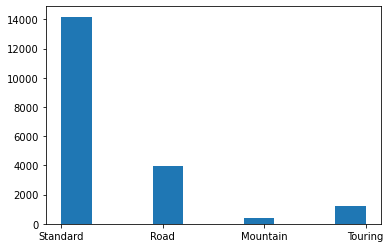

In [63]:
print('product_line:', txns_df['product_line'].unique())
print('blanks:', pd.isna(txns_df['product_line']).sum())
plt.hist(txns_df['product_line'][pd.notna(txns_df['product_line'])])

product_class: ['medium' 'low' 'high' nan]
blanks: 197


(array([13826.,     0.,     0.,     0.,     0.,  2964.,     0.,     0.,
            0.,  3013.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

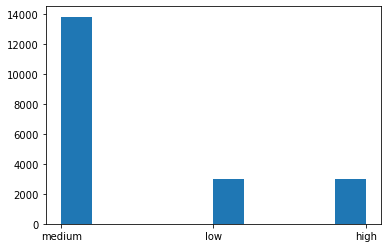

In [64]:
print('product_class:', txns_df['product_class'].unique())
print('blanks:', pd.isna(txns_df['product_class']).sum())
plt.hist(txns_df['product_class'][pd.notna(txns_df['product_class'])])

product_size: ['medium' 'large' 'small' nan]
blanks: 197


(array([12990.,     0.,     0.,     0.,     0.,  3976.,     0.,     0.,
            0.,  2837.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

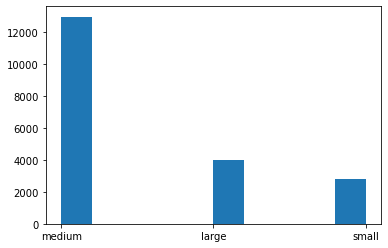

In [65]:
print('product_size:', txns_df['product_size'].unique())
print('blanks:', pd.isna(txns_df['product_size']).sum())
plt.hist(txns_df['product_size'][pd.notna(txns_df['product_size'])])

In [66]:
print('product_first_sold_date blanks:', pd.isna(txns_df['product_first_sold_date']).sum())

product_first_sold_date blanks: 197


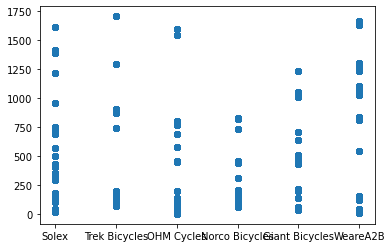

In [67]:
plt.scatter(txns_df['brand'][pd.notna(txns_df['brand'])], txns_df['profit'][pd.notna(txns_df['brand'])])